<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
%matplotlib inline

# Data Gathering

In [20]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
df.shape

(301, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [23]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [24]:
df["Fuel_Type_Petrol"] = df.Fuel_Type.map({"Petrol":1, "Diesel": 0, "CNG": 0})

In [25]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [26]:
df["Transmission"] = df.Transmission.map({"Manual" : 1, "Automatic": 0})

In [27]:
df.Transmission.unique()

array([1, 0], dtype=int64)

In [28]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [29]:
df["Seller_Type"] = df.Seller_Type.map({"Individual" : 1, "Dealer": 0})

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,0,1,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,0,1,0,1
4,swift,2014,4.60,6.87,42450,Diesel,0,1,0,0


In [31]:
df.Selling_Price = df.Selling_Price*1000

In [33]:
df.Selling_Price = df.Selling_Price.astype(int)

In [35]:
df.Present_Price = df.Present_Price*1000

In [36]:
df.Present_Price = df.Present_Price.astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Car_Name          301 non-null    object
 1   Year              301 non-null    int64 
 2   Selling_Price     301 non-null    int32 
 3   Present_Price     301 non-null    int32 
 4   Kms_Driven        301 non-null    int64 
 5   Fuel_Type         301 non-null    object
 6   Seller_Type       301 non-null    int64 
 7   Transmission      301 non-null    int64 
 8   Owner             301 non-null    int64 
 9   Fuel_Type_Petrol  301 non-null    int64 
dtypes: int32(2), int64(6), object(2)
memory usage: 21.3+ KB


In [38]:
df.drop("Fuel_Type", axis=1, inplace=True)

In [39]:
df = df.iloc[:,[0,1,3,4,5,6,7,8,2]]
df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_Petrol,Selling_Price
0,ritz,2014,5590,27000,0,1,0,1,3350
1,sx4,2013,9540,43000,0,1,0,0,4750
2,ciaz,2017,9850,6900,0,1,0,1,7250
3,wagon r,2011,4150,5200,0,1,0,1,2850
4,swift,2014,6870,42450,0,1,0,0,4600


In [40]:
df.Car_Name.nunique()

98

In [41]:
df.shape

(301, 9)

In [42]:
df = pd.get_dummies(df, drop_first=False)

In [43]:
df.head()

,Year,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_Petrol,Selling_Price,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,Car_Name_Hyosung GT250R,Car_Name_KTM 390 Duke,...,Car_Name_Royal Enfield Thunder 350,Car_Name_Royal Enfield Thunder 500,Car_Name_Suzuki Access 125,Car_Name_TVS Apache RTR 160,Car_Name_TVS Apache RTR 180,Car_Name_TVS Jupyter,Car_Name_TVS Sport,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent
0,2014,5590,27000,0,1,0,1,3350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2013,9540,43000,0,1,0,0,4750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2017,9850,6900,0,1,0,1,7250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2011,4150,5200,0,1,0,1,2850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2014,6870,42450,0,1,0,0,4600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [44]:
df.shape

(301, 106)

### Features and target variable

In [45]:
X = df.drop("Selling_Price", axis =1)
y = df["Selling_Price"]

### Splitting data into training and testing

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
X_train.shape

(210, 105)

In [49]:
X_test.shape

(91, 105)

## Scaling the Data

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()

In [51]:
scaler.fit(X_train) ## burda sedece X_train ait mean ve standart sapma bilgisini alıyor.
                    ## burda fit komutu bilgileri topluyor, eğitim yaptırmıyor.

MinMaxScaler()

In [52]:
X_train_scaled = scaler.transform(X_train)
##X_train_scaled

In [53]:
X_test_scaled = scaler.transform(X_test)
#X_test_scaled

##  Model Building (Linear Regression)

In [54]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [55]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [56]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

# Interpret the model

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [58]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,9.504658e-01,-2.040618e+24
mae,7.082857e+02,1.274806e+15
mse,1.601973e+06,2.024860e+31
rmse,1.265691e+03,4.499845e+15


In [59]:
lm.intercept_

-2541376418125973.0

# Model Evaluation

In [60]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [61]:
pd.DataFrame(X).corr().style.applymap(color_red)

## Cross Validate

In [62]:
from sklearn.model_selection import cross_validate, cross_val_score

In [63]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [65]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.007997,0.003000,-2.918788e+22,-3.836283e+14,-1.042271e+30,-1.020917e+15
2,0.004992,0.002011,-3.405674e+24,-2.870379e+15,-1.239844e+32,-1.113483e+16
3,0.005993,0.002007,-2.766021e+24,-3.977087e+15,-6.360182e+31,-7.975075e+15
4,0.005021,0.003003,-8.487272e+24,-8.180190e+15,-2.719844e+32,-1.649195e+16
5,0.004985,0.002998,-2.157046e+24,-3.159397e+15,-6.172662e+31,-7.856629e+15


In [66]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                            -3.369040e+24
test_neg_mean_absolute_error       -3.714136e+15
test_neg_mean_squared_error        -1.044679e+32
test_neg_root_mean_squared_error   -8.895880e+15
dtype: float64

In [67]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,9.504658e-01,-2.040618e+24
mae,7.082857e+02,1.274806e+15
mse,1.601973e+06,2.024860e+31
rmse,1.265691e+03,4.499845e+15


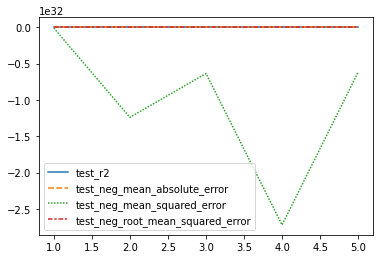

In [68]:
sns.lineplot(data = scores.iloc[:,2:]);

In [72]:
lm.coef_

array([ 9.04839021e+03,  5.23898880e+04, -1.73069093e+03, -1.29669742e+03,
       -7.63553330e+02,  1.15200767e+03, -1.03445569e+03,  3.22054104e+16,
        2.54137642e+15,  2.54137642e+15,  2.54137642e+15,  2.54137642e+15,
        2.54137642e+15,  2.54137642e+15,  2.54137642e+15,  2.54137642e+15,
        2.10759561e+16,  2.54137642e+15,  2.54137642e+15,  2.54137642e+15,
       -1.49443258e+15,  2.54137642e+15,  2.54137642e+15,  2.54137642e+15,
        2.54137642e+15,  6.75737423e+15, -2.58194228e+14,  2.54137642e+15,
        2.54137642e+15,  2.54137642e+15,  2.54137642e+15,  2.54137642e+15,
        2.54137642e+15,  2.54137642e+15,  2.54137642e+15,  2.54137642e+15,
        6.87073252e+15,  2.54137642e+15,  2.54137642e+15,  2.54137642e+15,
        2.54137642e+15,  2.54137642e+15,  2.54137642e+15,  2.54137642e+15,
        2.54137642e+15, -1.93901285e+16,  2.54137642e+15,  2.54137642e+15,
        2.54137642e+15,  2.54137642e+15,  2.54137642e+15,  2.54137642e+15,
        2.54137642e+15,  

In [73]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,9.048390e+03
1,5.238989e+04
2,-1.730691e+03
3,-1.296697e+03
4,-7.635533e+02
...,...
100,2.541376e+15
101,2.541376e+15
102,2.541376e+15
103,2.541376e+15


# Regularization

# Ridge

In [108]:
from sklearn.linear_model import Ridge

In [109]:
ridge_model = Ridge(alpha=1, random_state=42)

In [110]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [111]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [112]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,9.114190e-01,6.462414e-01
mae,1.021513e+03,1.414044e+03
mse,2.864775e+06,3.510269e+06
rmse,1.692565e+03,1.873571e+03


In [113]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,9.504658e-01,-2.040618e+24,9.114190e-01,6.462414e-01
mae,7.082857e+02,1.274806e+15,1.021513e+03,1.414044e+03
mse,1.601973e+06,2.024860e+31,2.864775e+06,3.510269e+06
rmse,1.265691e+03,4.499845e+15,1.692565e+03,1.873571e+03


In [114]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [115]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.005993,0.003003,0.830095,-1318.711680,-6.067145e+06,-2463.157577
2,0.003992,0.003002,0.794896,-1833.965156,-7.466860e+06,-2732.555645
3,0.003999,0.002002,0.795567,-1573.229783,-4.700736e+06,-2168.118187
4,0.003002,0.002995,0.440004,-2032.191547,-1.794572e+07,-4236.238751
5,0.002995,0.003003,0.943154,-913.551210,-1.626720e+06,-1275.429146


In [116]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             7.607431e-01
test_neg_mean_absolute_error       -1.534330e+03
test_neg_mean_squared_error        -7.561436e+06
test_neg_root_mean_squared_error   -2.575100e+03
dtype: float64

In [117]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,9.114190e-01,6.462414e-01
mae,1.021513e+03,1.414044e+03
mse,2.864775e+06,3.510269e+06
rmse,1.692565e+03,1.873571e+03


<AxesSubplot:>

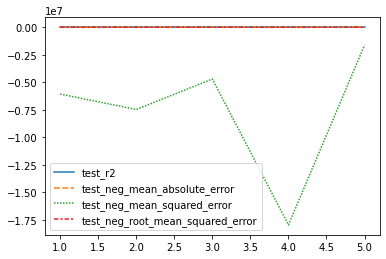

In [118]:
sns.lineplot(data = scores.iloc[:,2:])

In [119]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [120]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,9.048390e+03,6992.876011
1,5.238989e+04,13775.859514
2,-1.730691e+03,-1377.428154
3,-1.296697e+03,-3361.148087
4,-7.635533e+02,-2921.960300
...,...,...
100,2.541376e+15,-1358.966808
101,2.541376e+15,96.330673
102,2.541376e+15,-211.750421
103,2.541376e+15,-75.839989


## Choosing best alpha value with Cross-Validation

In [121]:
from sklearn.linear_model import RidgeCV

In [122]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [123]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [124]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [125]:
ridge_cv_model.alpha_

0.03

In [126]:
ridge_cv_model.best_score_

-2466.432757694235

In [127]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [128]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,9.480397e-01,6.182180e-01
mae,7.461922e+02,1.292546e+03
mse,1.680434e+06,3.788340e+06
rmse,1.296316e+03,1.946366e+03


In [130]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,9.504658e-01,-2.040618e+24,9.114190e-01,6.462414e-01,9.480397e-01,6.182180e-01
mae,7.082857e+02,1.274806e+15,1.021513e+03,1.414044e+03,7.461922e+02,1.292546e+03
mse,1.601973e+06,2.024860e+31,2.864775e+06,3.510269e+06,1.680434e+06,3.788340e+06
rmse,1.265691e+03,4.499845e+15,1.692565e+03,1.873571e+03,1.296316e+03,1.946366e+03


In [132]:
ridge_cv_model.coef_

array([ 9.81698743e+03,  3.35875224e+04, -1.29288336e+03, -1.79855906e+03,
       -1.72014645e+03,  1.34277152e+03, -1.11939585e+03,  0.00000000e+00,
        2.69460926e+02, -3.66956856e+03, -6.99708506e+02, -1.06708215e+03,
       -1.18004466e+03, -1.57892281e+03,  1.09740275e+03,  2.03531869e+03,
        0.00000000e+00,  2.77675164e+02, -1.36553367e+03,  1.26958722e+02,
        0.00000000e+00,  1.11034429e+03,  7.78097483e+02,  1.35869484e+03,
       -9.41638377e+02,  0.00000000e+00,  0.00000000e+00,  5.22829094e+02,
        5.98768421e+02,  2.15311857e+03,  1.45484875e+03,  3.34559608e+03,
       -1.28507888e+03, -1.16114621e+03, -1.28283851e+03, -1.24887659e+03,
        0.00000000e+00, -3.00148059e+03, -3.58435975e+03, -1.51196982e+03,
        6.73933975e+02,  6.92199515e+02, -6.37836204e+02,  1.65805039e+03,
        4.30598631e+02,  0.00000000e+00,  3.01979936e+03, -1.33920499e+03,
        1.17450220e+02, -1.11977592e+03, -3.21622932e+02, -8.20393289e+02,
       -9.09080933e+02, -

In [133]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.03"])

In [134]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.03
0,9.048390e+03,6992.876011,9816.987425
1,5.238989e+04,13775.859514,33587.522398
2,-1.730691e+03,-1377.428154,-1292.883356
3,-1.296697e+03,-3361.148087,-1798.559059
4,-7.635533e+02,-2921.960300,-1720.146447
...,...,...,...
100,2.541376e+15,-1358.966808,7.719167
101,2.541376e+15,96.330673,599.705274
102,2.541376e+15,-211.750421,-212.543385
103,2.541376e+15,-75.839989,1650.454763


# Lasso

In [73]:
from sklearn.linear_model import Lasso, LassoCV

In [74]:
lasso_model = Lasso(alpha=10, random_state=42, max_iter=5000)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=10, max_iter=5000, random_state=42)

In [75]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [76]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.000000,-0.088835
mae,3.861943,2.677567
mse,32.340735,10.804276
rmse,5.686891,3.286986


In [77]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.932064,-1.665175e+25,0.873146,0.555831,0.893704,0.565558,0.000000,-0.088835
mae,0.890257,3.129792e+12,1.182008,1.586767,1.104569,1.537524,3.861943,2.677567
mse,2.197086,1.652317e+26,4.102539,4.407389,3.437690,4.310876,32.340735,10.804276
rmse,1.482257,1.285425e+13,2.025473,2.099378,1.854101,2.076265,5.686891,3.286986


## For Lasso CV with Default Alpha : 1

In [78]:
model = Lasso(alpha=1, random_state=42, max_iter=5000)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [79]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.007004,0.003997,0.197964,-3.255215,-28.639928,-5.351629
2,0.003967,0.003001,0.060044,-4.004871,-34.219320,-5.849728
3,0.002999,0.002002,0.279624,-3.005386,-16.564316,-4.069928
4,0.001998,0.002002,0.157651,-3.349086,-26.994059,-5.195581
5,0.002007,0.001993,0.268942,-3.110267,-20.920164,-4.573857


In [80]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.192845
test_neg_mean_absolute_error        -3.344965
test_neg_mean_squared_error        -25.467557
test_neg_root_mean_squared_error    -5.008144
dtype: float64

In [81]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.000000,-0.088835
mae,3.861943,2.677567
mse,32.340735,10.804276
rmse,5.686891,3.286986


In [82]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.932064,-1.665175e+25,0.873146,0.555831,0.893704,0.565558,0.000000,-0.088835
mae,0.890257,3.129792e+12,1.182008,1.586767,1.104569,1.537524,3.861943,2.677567
mse,2.197086,1.652317e+26,4.102539,4.407389,3.437690,4.310876,32.340735,10.804276
rmse,1.482257,1.285425e+13,2.025473,2.099378,1.854101,2.076265,5.686891,3.286986


In [83]:
lasso_model.coef_

array([ 0.,  0., -0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,
       -0., -0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,
       -0., -0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,
        0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
        0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,  0.,  0., -0.,  0.,
       -0.,  0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.])

## Elastic-Net 